<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

In [ ]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

<h4>Task  1: Prepare the 3 datasets</h4>

In [ ]:
# print dataset
print("data.shape =", data.shape)
print("\nData --->")
print(data)

print("\n\n")

# make target 2d matrix
target = target[:, np.newaxis]

print("target.shape =", target.shape)
print("\nTarget --->")
print(target)

data.shape = (442, 10)

Data --->
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]



target.shape = (442, 1)

Target --->
[[151.]
 [ 75.]
 [141.]
 [206.]
 [135.]
 [ 97.]
 [138.]
 [ 63.]
 [110.]
 [310.]
 [101.]
 [ 69.]
 [179.]
 [185.]
 [118.]
 [171.]
 [166.]
 [144.]
 [ 97.]
 [168.]
 [ 68.]
 [ 49.]
 [ 68.]
 [245.]
 [184.]
 [202.]
 [137.]
 [ 85.]
 [131.]
 [283.]
 [129.]
 [ 59.]
 [341.]
 [ 87.]
 [ 65.]
 [102.]
 [265.]
 [276.]
 [252.]
 [ 90.]
 [100.]
 [ 55.]
 [ 61.]
 [ 92.]
 [259.]
 [ 53.]
 [190.]
 [142.]
 [ 75.]
 [142.]
 [155.]
 [225.]
 [ 59.]
 [104.]
 [

In [ ]:
# Split into training, validation, and testing
# 60% for training, 20% for validation, 20% for testing
train_data, validation_data, train_target, validation_target = train_test_split(data, target, test_size=0.2, random_state=42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size=0.25, random_state=42)

# print shape
print("train_data.shape =", train_data.shape)
print("train_target.shape =", train_target.shape)
print()
print("valid_data.shape =", validation_data.shape)
print("valid_target.shape =", validation_target.shape)
print()
print("test_data.shape =", test_data.shape)
print("test_target.shape =", test_target.shape)

train_data.shape = (264, 10)
train_target.shape = (264, 1)

valid_data.shape = (89, 10)
valid_target.shape = (89, 1)

test_data.shape = (89, 10)
test_target.shape = (89, 1)


<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

In [ ]:
from sklearn.linear_model import LinearRegression
# create model
lr = LinearRegression()
lr.fit(train_data, train_target)

LinearRegression()

In [ ]:
# print weights and bias
print("weights: ", lr.coef_)
print("bias: ", lr.intercept_)

weights:  [[   24.44732503  -238.39774142   531.91390399   314.50640334
  -1054.38742894   561.77774095   239.76995481   320.43700145
    815.36269517    80.8334332 ]]
bias:  [147.60360155]


In [ ]:
from sklearn.metrics import mean_squared_error
# print MSE of training, validation, and testing data using sklearn
print("Training loss using sklearn - MSE:", mean_squared_error(train_target, lr.predict(train_data)))
print("Validation loss using sklearn - MSE:", mean_squared_error(validation_target, lr.predict(validation_data)))
print("Testing loss using sklearn - MSE:", mean_squared_error(test_target, lr.predict(test_data)))

Training loss using sklearn - MSE: 2982.29180960148
Validation loss using sklearn - MSE: 2932.9170617978175
Testing loss using sklearn - MSE: 2620.7963509159395


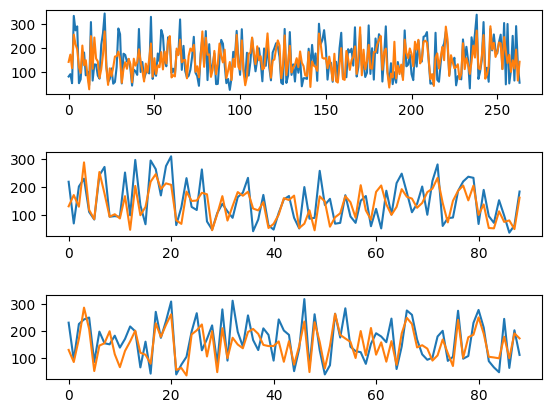

In [ ]:
# plot predicted and true values
fig = plt.figure()
fig.subplots_adjust(hspace=0.7)

# plot training prediction and target
plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_target")
plt.plot(np.arange(train_target.shape[0]), lr.predict(train_data), label = "train_predict")

# plot validation prediction and target
plt.subplot(3,1,2)
plt.plot(np.arange(validation_target.shape[0]), validation_target, label = "validation_target")
plt.plot(np.arange(validation_target.shape[0]), lr.predict(validation_data), label = "validation_predict")

# plot testing prediciton and target
plt.subplot(3,1,3)
plt.plot(np.arange(test_data.shape[0]), test_target, label = "testing_target")
plt.plot(np.arange(test_data.shape[0]), lr.predict(test_data), label = "testing_predict")

<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.

In [ ]:
# scaling values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
validation_data = scaler.transform(validation_data)
test_data = scaler.transform(test_data)

# print data
print("train_data:\n", train_data)
print("validation_data:\n", validation_data)
print("test_data:\n", test_data)

# adding a column of 1s
train_data_bias = np.insert(train_data, 0, 1, axis=1)
validation_data_bias = np.insert(validation_data, 0, 1, axis=1)
test_data_bias = np.insert(test_data, 0, 1, axis=1)

train_data:
 [[ 0.79709965  1.02299151 -0.22619586 ...  1.05427009 -0.59173298
   2.16199316]
 [ 0.4047911   1.02299151 -0.29478205 ...  0.71602647  0.09385659
  -0.03089986]
 [ 0.48325281  1.02299151 -0.70629919 ... -0.07058661 -0.26249843
   0.31996303]
 ...
 [-0.37982601 -0.97752522  1.12266585 ... -0.85719968 -0.61745754
  -0.29404702]
 [-2.10598364 -0.97752522 -1.64364377 ... -0.85719968 -1.32498279
  -1.87292999]
 [-1.16444311 -0.97752522  1.48845885 ... -0.47175927 -1.04959035
  -0.03089986]]
validation_data:
 [[ 9.54023072e-01 -9.77525220e-01 -1.57609676e-01 -3.07464438e-01
   2.62707870e+00  2.58594693e+00  5.01084020e-01  7.16026470e-01
   6.85521587e-01 -2.06331298e-01]
 [ 1.97402531e+00 -9.77525220e-01  7.56872841e-01  4.77827320e-01
  -4.67473540e-01 -3.13954755e-01  9.39243362e-02 -8.57199680e-01
  -5.16553435e-01 -5.57194181e-01]
 [ 1.34633163e+00  1.02299151e+00 -1.11885550e-01 -2.36074278e-01
   2.17283250e+00  1.02396898e+00  1.31540339e+00 -7.05866051e-02
   1.824381

In [ ]:
# linear combination
def myModel(X, w):
  return np.dot(X, w)

# calculate loss value
def lossFunction(X, w, y):
  return np.mean((np.dot(X,w)-y) ** 2)/2

In [ ]:
# define training loop
def trainingLoop(train_data, train_target, validation_data, validation_target, learning_rate, numItrs):
  # create history list
  train_error = np.zeros(numItrs)
  validation_error = np.zeros(numItrs)

  # initialize random weights
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  # loop for number of iterations
  for i in range(numItrs):

    # calculate gradient
    gradient = (-1) * np.dot(train_data.T, (train_target - np.dot(train_data, w))) / (train_data.shape[0])

    # update weights
    w = w + learning_rate * (-1 * gradient)

    # add error to list
    train_error[i] = lossFunction(train_data, w, train_target)
    validation_error[i] = lossFunction(validation_data, w, validation_target)

  return w, train_error, validation_error

weights:
 [[  1.48373168]
 [-11.45525019]
 [ 25.91284664]
 [ 14.97966577]
 [ -7.17474342]
 [ -7.02172468]
 [ -8.02886419]
 [  8.53589464]
 [ 21.39339844]
 [  4.09024029]]
bias: [[149.80415597]]

Training loss using CS4210 style - MSE: 1506.0266406746514
Validation loss using CS4210 style - MSE: 1454.0966450527965
Testing loss using CS4210 style - MSE: 1312.5821883425674


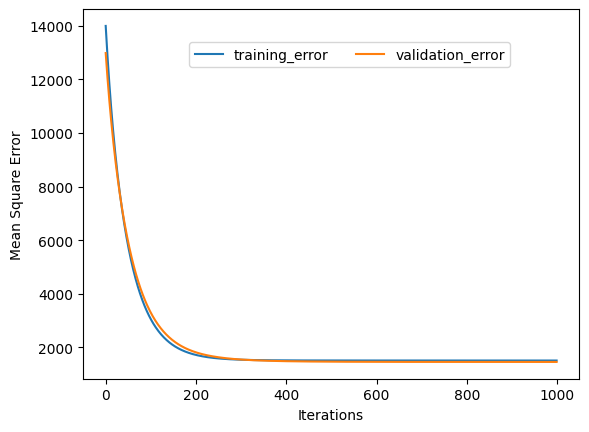

In [ ]:
learning_rate = 0.01   # learning rate
numItrs = 1000   # number of iterations

# run training loop
w, train_error, validation_error = trainingLoop(train_data_bias, train_target, validation_data_bias, validation_target, learning_rate, numItrs)

print("weights:\n", w[1:])
print("bias:", w[:1])
print()

plt.plot(np.arange(numItrs), train_error, label = "training_error")
plt.plot(np.arange(numItrs), validation_error, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol=2)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")

print("Training loss using CS4210 style - MSE:", lossFunction(train_data_bias, w, train_target))
print("Validation loss using CS4210 style - MSE:", lossFunction(validation_data_bias, w, validation_target))
print("Testing loss using CS4210 style - MSE:", lossFunction(test_data_bias, w, test_target))

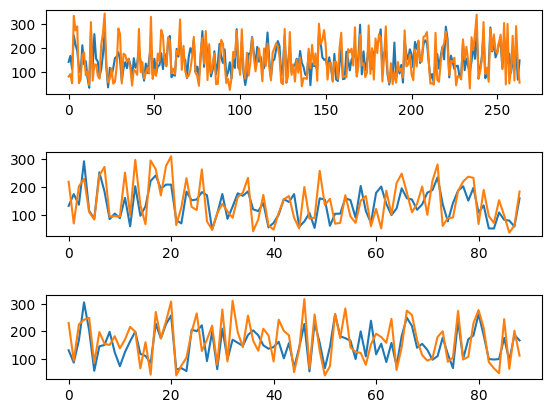

In [ ]:
# plot prediction and target
fig = plt.figure()
fig.subplots_adjust(hspace=0.7)

# plot training data
plt.subplot(3,1,1)
plt.plot(np.arange(train_data.shape[0]), myModel(train_data_bias, w), label = "train_predict")
plt.plot(np.arange(train_data.shape[0]), train_target, label = "train_target")

# plot validation data
plt.subplot(3,1,2)
plt.plot(np.arange(validation_data.shape[0]), myModel(validation_data_bias, w), label = "validation_predict")
plt.plot(np.arange(validation_data.shape[0]), validation_target, label = "validation_target")

# plot testing data
plt.subplot(3,1,3)
plt.plot(np.arange(test_data.shape[0]), myModel(test_data_bias, w), label = "test_predict")
plt.plot(np.arange(test_data.shape[0]), test_target, label = "test_target")


<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.




In [ ]:
import math

def trainingLoopStochastic(train_data, train_target, validation_data, validation_target, numItrs, learning_rate, batch_size):
  # number of batches in the training data
  num_batches = math.ceil(train_data.shape[0] / batch_size)

  # error is recorded per batch, so size is (num of batches * num of iterations)
  training_error = np.zeros(numItrs * num_batches)
  validation_error = np.zeros(numItrs * num_batches)

  # initalize weights
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  # start training
  for i in range(numItrs):
    # run gradient descent on batches
    current_batch = 0
    for start in range(0, train_data.shape[0], batch_size):
      # split trainning data into batches
      train_data_batch = train_data[start:start + batch_size]
      train_target_batch = train_target[start:start + batch_size]

      gradient = (-1) * np.dot(train_data_batch.T, (train_target_batch - np.dot(train_data_batch, w))) / train_data_batch.shape[0]

      # update weights
      w = w + learning_rate * (-1 * gradient)

      # add error to list
      batch_count = i * num_batches + current_batch
      training_error[batch_count] = lossFunction(train_data_batch, w, train_target_batch)
      validation_error[batch_count] = lossFunction(validation_data, w, validation_target)
      current_batch += 1


  return w, training_error, validation_error

weights:
 [[ -5.24324496]
 [ -9.06760991]
 [ 24.24911034]
 [ 17.91855888]
 [ -4.26217838]
 [ -3.79153988]
 [-10.28229507]
 [  0.44272784]
 [ 26.25126508]
 [  3.09095547]]
bias: [[151.40606946]]

Training loss using CS4210 style - MSE: 1536.2713135270008
Validation loss using CS4210 style - MSE: 1369.0108424885377
Testing loss using CS4210 style - MSE: 1320.5777892955593


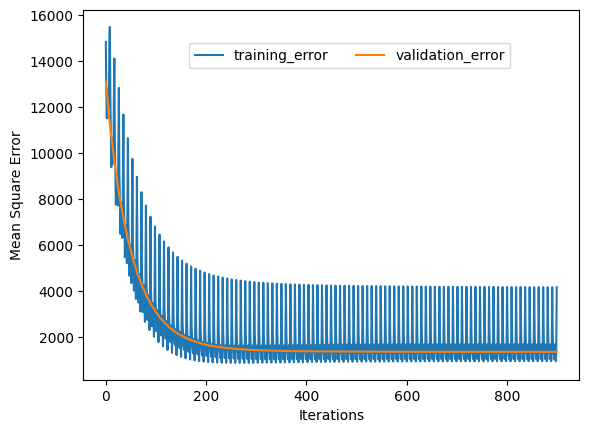

In [ ]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
batch_size = 32 # number of data samples in a batch
epochs = 100   # number of epochs

# calcualte the number of batches in the data
num_batches = math.ceil(train_data.shape[0] / batch_size)

w, train_error_batch, validation_error_batch = trainingLoopStochastic(train_data_bias, train_target, validation_data_bias, validation_target, epochs, learning_rate, batch_size)

# print weights and bias
print("weights:\n", w[1:])
print("bias:", w[:1])
print()

# plot training and validation error
plt.plot(np.arange(epochs * num_batches), train_error_batch, label = "training_error")
plt.plot(np.arange(epochs * num_batches), validation_error_batch, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol=2)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")

# print loss score
print("Training loss using CS4210 style - MSE:", lossFunction(train_data_bias, w, train_target))
print("Validation loss using CS4210 style - MSE:", lossFunction(validation_data_bias, w, validation_target))
print("Testing loss using CS4210 style - MSE:", lossFunction(test_data_bias, w, test_target))


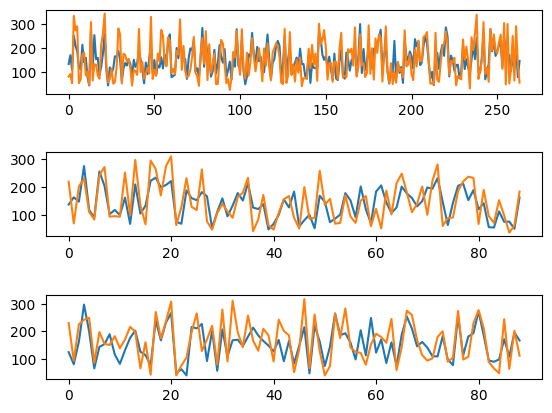

In [ ]:
# plot prediction and target
fig = plt.figure()
fig.subplots_adjust(hspace=0.7)

# plot training data
plt.subplot(3,1,1)
plt.plot(np.arange(train_data.shape[0]), myModel(train_data_bias, w), label = "train_predict")
plt.plot(np.arange(train_data.shape[0]), train_target, label = "train_target")

# plot validation data
plt.subplot(3,1,2)
plt.plot(np.arange(validation_data.shape[0]), myModel(validation_data_bias, w), label = "validation_predict")
plt.plot(np.arange(validation_data.shape[0]), validation_target, label = "validation_target")

# plot testing data
plt.subplot(3,1,3)
plt.plot(np.arange(test_data.shape[0]), myModel(test_data_bias, w), label = "test_predict")
plt.plot(np.arange(test_data.shape[0]), test_target, label = "test_target")
